<a href="https://colab.research.google.com/github/NULabTMN/hw1-aidasharif1365/blob/master/PS1_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this experiment, you will explore the accuracy of sentiment classificaiton using different feature representations of text documents.

First, you will implement `createBasicFeatures`, which creates a sparse matrix representation of a collection of documents. For this exercise, you should have a feature for each word containing at least one alphabetic character. You may use the `numpy` and `sklearn` packages to help with implementing a sparse matrix.

Then, you will implement `createFancyFeatures`, which can specify at any other features you choose to help improve performance on the classification task.

The two code blocks at the end train and evaluate two models—logistic regression with L1 and L2 regularization—using your featurization functions. Besides held-out classification accuracy with 10-fold cross-validation, you will also see the features in each class given high weights by the model.

A helpful resource for getting up to speed with vector representations of documents is the first two chapters of Delip Rao and Brian McMahan, _Natural Language Processing with PyTorch_, O'Reilly, 2019.  You should be able to <a href="https://learning.oreilly.com/library/view/natural-language-processing/9781491978221/">read it online</a> via the Northeastern Library's subscription using a <tt>northeastern.edu</tt> email address.

In [ ]:
import re
import nltk
import json
import spacy
import string
import requests
import collections
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate,LeaveOneOut,KFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from spacy.lang.en import English
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
# read in the movie review corpus
def readReviews():
  raw = requests.get("https://raw.githubusercontent.com/mutherr/CS6120-PS1-data/master/cornell_reviews.json").text.strip()
  corpus = [json.loads(line) for line in raw.split("\n")]

  return corpus

In [ ]:
#stems the tokens using porterstemmer
def stemSentence(sentence):
  porter = PorterStemmer()
  token_words=word_tokenize(sentence)
  stem_sentence=[]
  for word in token_words:
      stem_sentence.append(porter.stem(word))
      stem_sentence.append(" ")
  return "".join(stem_sentence)

In [ ]:
#lemmatize tokens using WordNetLemmatizer
def lemmaSentence(sentence):
  wordnet_lemmatizer = WordNetLemmatizer()
  token_words=word_tokenize(sentence)
  lemma_sentence=[]
  for word in token_words:
      lemma_sentence.append(wordnet_lemmatizer.lemmatize(word))
      lemma_sentence.append(" ")
  return "".join(lemma_sentence)

In [ ]:
#this function removes stopwords(the dict is passed to it as an input) and punctuations
def remove_stopwords(sentence,stopwords_dict):
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  no_punct = ""
  token_words=word_tokenize(sentence)
  no_stop=' '.join([word for word in token_words if word not in stopwords_dict])

  for char in no_stop:
    if char not in punctuations:
        no_punct = no_punct + char
  return no_punct

This is where you will implement two functions to featurize the data.

In [ ]:
# NB: The current contents are for testing only
# This function should return: 
#  -a sparse numpy matrix of document features
#  -a list of the correct class for each document
#  -a list of the vocabulary used by the features, such that the ith term of the
#    list is the word whose counts appear in the ith column of the matrix. 

# This function should create a feature representation using all tokens that
# contain an alphabetic character.
def createBasicFeatures(corpus):

  texts=[]
  vocab=[]
  classes=[]

  for i in range(len(corpus)):
    texts.append(corpus[i]["text"])
    classes.append(corpus[i]["class"])

  #using countvectorizer to count words in documents
  one_hot_vectorizer = CountVectorizer()
  one_hot_matrix = one_hot_vectorizer.fit_transform(texts)
  vocab_dict = (one_hot_vectorizer.vocabulary_)

  for k in vocab_dict:
    vocab.append(k)

  return one_hot_matrix,classes,vocab

In [ ]:
corpus = readReviews()
X,y,vocab = createBasicFeatures(corpus)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.828500
The most informative terms for pos are: ['copious', 'inauspiciously', 'ascension', 'arija', 'oise', 'tilly', 'pansy', 'homeland', 'exhibit', 'kaleidoscopic', 'feminist', 'escher', 'unsigned', 'bogie', 'yagher', 'tannek', 'eligible', 'swedish', 'sympathy', 'charades']
The most informative terms for neg are: ['ankles', 'boasting', 'torpor', 'moff', 'criticisms', 'amazin', 'khe', 'saying', 'gheorghe', 'reprocessed', 'races', 'yzma', 'mineo', 'garde', 'midknight', 'techie', 'cilvilization', 'beers', 'facts', 'spectaculars']
----------L2 Norm-----------
The model's average accuracy is 0.833000
The most informative terms for pos are: ['unsigned', 'stacey', 'aged', 'tannek', 'bargaining', 'porting', 'tilly', 'pansy', 'inauspiciously', 'escher', 'necks', 'isolationist', 'moody', 'ascension', '_____', 'shy', 'unabated', 'cant', 'mcconaughey', 'oise']
The most informative terms for neg are: ['techie', 'khe', 'moff', 'ankles', 

In [ ]:
stopwords_dict = Counter(stop_words)
pos_dict=collections.defaultdict(lambda:0)
neg_dict=collections.defaultdict(lambda:0)
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for i in range(len(corpus)):
  sentence=(corpus[i]["text"])
  token_words=word_tokenize(sentence)
  if corpus[i]["class"]=='pos':
    for word in token_words:
      if word not in punctuations:
        pos_dict[word]=pos_dict[word]+1
  elif corpus[i]["class"]=='neg': 
    for word in token_words:
      if word not in punctuations:
        neg_dict[word]=neg_dict[word]+1
        
      
pos_dict={k:v for k,v in sorted(pos_dict.items(), key=lambda item:item[1],reverse=True)}
neg_dict={k:v for k,v in sorted(neg_dict.items(), key=lambda item:item[1],reverse=True)}


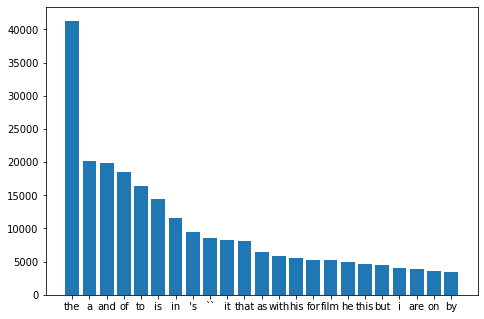

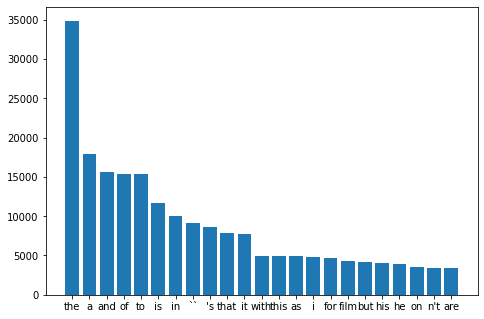

In [ ]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax2 = fig2.add_axes([0,0,1,1])
freqPos = []
wordsPos = []
freqNeg = []
wordsNeg = []

limit=23
for k in neg_dict:
  if limit>0:
    wordsNeg.append(k)
    freqNeg.append(neg_dict[k])
  limit-=1

limit=23
for k in pos_dict:
  if limit>0:
    wordsPos.append(k)
    freqPos.append(pos_dict[k])
  limit-=1

ax2.bar(wordsNeg,freqNeg)
ax1.bar(wordsPos,freqPos)
plt.show()

In [ ]:
words=['the', 'and','i','of','but','is','a','this','to','with','film']
stopwords_dict=dict.fromkeys(words,1)

In [ ]:
# This function can add other features you want that help classification
# accuracy, such as bigrams, word prefixes and suffixes, etc.
#basic cleaning, lemmatization, stem
#it stems, lemmatizes, removes stopwords, sets thresholds of min and max number
#of words in Countervectorizer, uses ngrams
#each feature changer could be turned on or off
def createFancyFeatures(corpus,stopword,stem,lemma,ngram,termFreq,tfidf,mindf,maxdf):
  raw=[]
  vocab=[]
  classes=[]

  #in a loop we choose which changes to apply to the features
  for i in range(len(corpus)):
    sentence=(corpus[i]["text"])
    if stopword:
      sentence=remove_stopwords(sentence,stopwords_dict)
    if stem:
      sentence=stemSentence(sentence)
    if lemma: 
      sentence=lemmaSentence(sentence)
    raw.append(sentence)
    classes.append(corpus[i]["class"])

  #using countvectorizer to count tokens and set thresholds for min and max
  vectorizer = CountVectorizer(ngram_range=ngram,min_df=mindf,max_df=maxdf) 
  #fitting the vectorizer
  texts = vectorizer.fit_transform(raw)
  vocab_dict = (vectorizer.vocabulary_)


  if termFreq:
    tf_transformer = TfidfTransformer(use_idf=False).fit(texts) 
    texts = tf_transformer.transform(texts)

  for k in vocab_dict:
    vocab.append(k)

  # Applying TFIDF 
  if tfidf:
    vectorizer = TfidfVectorizer(ngram_range=ngram,min_df=mindf,max_df=maxdf) 
    texts = vectorizer.fit_transform(raw)
    vocab_dict = (vectorizer.vocabulary_) 
    for k in vocab_dict:
      vocab.append(k)

  return texts,classes,vocab

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=False,stem=True,lemma=True,ngram=(1,2),termFreq=False,tfidf=False,mindf=1,maxdf=900000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.825000
The most informative terms for pos are: ['person ca', 'straight he', 'oddest structur', 'current boyfriend', 'cleverli told', 'sandler overprotect', 'solomon if', 'amaz play', 'hi ridicul', 'linda blair', 'about which', 'typ peopl', 'yourself mental', 'underdevelop from', 'goofbal comedi', 'factori at', 'hollywood financi', 'medic doctrin', 'although excel', 'gotten marri']
The most informative terms for neg are: ['or futil', 'model two', 'them involv', 'stiff that', 'loanshark', 'lebowski featur', 'use in', 'each main', 'for 400', 'suspici scientist', 'is focus', 'conveni abl', 'theron who', 'pack nice', 'assent short', 'tinier than', 'quickli got', 'finish and', 'to sport', 'curtain']
----------L2 Norm-----------
The model's average accuracy is 0.854500
The most informative terms for pos are: ['underdevelop from', 'amaz play', 'hi ridicul', 'repaint their', 'hollywood financi', 'him read', 'word rating', 'these lim

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=False,stem=False,lemma=True,ngram=(1,2),termFreq=False,tfidf=False,mindf=1,maxdf=900000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.824500
The most informative terms for pos are: ['gyrating with', 'enough hot', 'meet sugar', 'discovers snuff', 'hope another', 'island 12', 'upside it', 'georgia keaton', 'meet hong', 'sexy film', 'sized bomb', 'had watchabe', 'quiet drama', 'them just', 'car turn', 'something electrical', 'until mike', 'fang encourages', 'of trashing', 'russia to']
The most informative terms for neg are: ['past performance', 'to prep', 'time michael', 'that place', 'alert all', 'serbedzija ha', 'unflattering', 'in east', 'lawman reelection', 'definitely failed', 'the talking', 'beatrice but', 'since retained', 'to normal', 'bowden get', 'the trio', 'dump the', 'preceded the', 'boy owen', 'and quote']
----------L2 Norm-----------
The model's average accuracy is 0.853000
The most informative terms for pos are: ['marc hayashi', 'meet hong', 'hope another', 'sexy film', 'nun mark', 'kitty', 'backwards machismo', 'nick rudy', 'the levite', '18

In [ ]:
words=['the','is','a']
stopwords_dict=dict.fromkeys(words,1)
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=True,stem=False,lemma=True,ngram=(1,2),termFreq=False,tfidf=False,mindf=5,maxdf=900000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.819500
The most informative terms for pos are: ['through another', 'go under', 'bump into', 'mafioso', 'and stephen', 'room that', 'add more', 'saved', 'spoiled', 'burn', 'shipped', 'end at', 'sour', 'whisper', 'they killed', 'berry', 'if her', 'jimmy stewart', 'liev schreiber', 'aerosmith']
The most informative terms for neg are: ['being with', 'in miami', 'come it', 'and energetic', 'have two', 'disliked', 'do have', 'some attempt', 'of there', 'memorable moment', 'over top', 'prison', 'introduced but', 'funny movie', 'unrelated', 'tiny', 're left', 'and father', 'his escape', 'bored by']
----------L2 Norm-----------
The model's average accuracy is 0.843500
The most informative terms for pos are: ['sour', 'dedicates', 'aerosmith', 'choreography', 'jimmy stewart', 'they killed', 'seeing film', 'if her', 'and using', 'go under', 'at least', 'berry', 'of word', 'it okay', 'through another', 'expected', 'but which', 'of cinem

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=False,stem=False,lemma=True,ngram=(1,2),termFreq=False,tfidf=False,mindf=3,maxdf=10000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.825000
The most informative terms for pos are: ['ability in', 'in shakespeare', 'this contrast', 'made an', 'importantly it', 'he grows', 'just window', 'and nice', 'brief but', 'of 100', 'surrender', 'cheesy and', 'rocky start', 'alice is', 'vivid', 'unconvincing in', 'republic', 'memorable and', 'do buy', 'thing found']
The most informative terms for neg are: ['first sequence', 'carlin', 'glenda', 'unspeakable', 'sharp and', 'and minute', 'thought would', 'kill him', 'in our', 'however all', 'example of', 'war is', 'something much', 'of 1999', 'and consequently', 'an ending', 'swear', 'material from', 'fine line', 'in session']
----------L2 Norm-----------
The model's average accuracy is 0.850500
The most informative terms for pos are: ['of 100', 'carl sagan', 'importantly it', 'have heart', 'surrender', 'trouble his', 'thing found', 'and brief', 'it power', 'as and', 'move the', 'rasp', 'master plan', 'done very', 'uncon

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=False,stem=False,lemma=True,ngram=(1,2),termFreq=False,tfidf=False,mindf=3,maxdf=30000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.825000
The most informative terms for pos are: ['ability in', 'in shakespeare', 'this contrast', 'made an', 'importantly it', 'he grows', 'just window', 'and nice', 'brief but', 'of 100', 'surrender', 'cheesy and', 'rocky start', 'alice is', 'vivid', 'unconvincing in', 'republic', 'memorable and', 'do buy', 'thing found']
The most informative terms for neg are: ['first sequence', 'carlin', 'glenda', 'unspeakable', 'sharp and', 'and minute', 'thought would', 'kill him', 'in our', 'however all', 'example of', 'war is', 'something much', 'of 1999', 'and consequently', 'an ending', 'swear', 'material from', 'fine line', 'in session']
----------L2 Norm-----------
The model's average accuracy is 0.850500
The most informative terms for pos are: ['of 100', 'carl sagan', 'importantly it', 'have heart', 'surrender', 'trouble his', 'thing found', 'and brief', 'it power', 'as and', 'move the', 'rasp', 'master plan', 'done very', 'uncon

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=False,stem=False,lemma=True,ngram=(1,2),termFreq=False,tfidf=False,mindf=3,maxdf=7000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.825500
The most informative terms for pos are: ['ability in', 'in shakespeare', 'this contrast', 'made an', 'importantly it', 'he grows', 'just window', 'and nice', 'brief but', 'of 100', 'surrender', 'cheesy and', 'rocky start', 'alice is', 'vivid', 'unconvincing in', 'republic', 'memorable and', 'do buy', 'thing found']
The most informative terms for neg are: ['first sequence', 'carlin', 'glenda', 'unspeakable', 'sharp and', 'and minute', 'thought would', 'kill him', 'in our', 'however all', 'example of', 'war is', 'something much', 'of 1999', 'and consequently', 'an ending', 'swear', 'material from', 'fine line', 'in session']
----------L2 Norm-----------
The model's average accuracy is 0.850500
The most informative terms for pos are: ['of 100', 'carl sagan', 'importantly it', 'have heart', 'surrender', 'trouble his', 'thing found', 'and brief', 'it power', 'as and', 'move the', 'rasp', 'master plan', 'done very', 'uncon

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=False,stem=False,lemma=True,ngram=(1,2),termFreq=False,tfidf=False,mindf=3,maxdf=5000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.824500
The most informative terms for pos are: ['ability in', 'in shakespeare', 'this contrast', 'made an', 'importantly it', 'he grows', 'just window', 'and nice', 'brief but', 'of 100', 'surrender', 'cheesy and', 'rocky start', 'alice is', 'vivid', 'unconvincing in', 'republic', 'memorable and', 'do buy', 'thing found']
The most informative terms for neg are: ['first sequence', 'carlin', 'glenda', 'unspeakable', 'sharp and', 'and minute', 'thought would', 'kill him', 'in our', 'however all', 'example of', 'war is', 'something much', 'of 1999', 'and consequently', 'an ending', 'swear', 'material from', 'fine line', 'in session']
----------L2 Norm-----------
The model's average accuracy is 0.850500
The most informative terms for pos are: ['of 100', 'carl sagan', 'importantly it', 'have heart', 'surrender', 'trouble his', 'thing found', 'and brief', 'it power', 'as and', 'move the', 'rasp', 'master plan', 'done very', 'uncon

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=False,stem=True,lemma=True,ngram=(1,2),termFreq=False,tfidf=False,mindf=3,maxdf=5000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.821000
The most informative terms for pos are: ['place even', 'also star', 'afterward', 'detail how', 'brain and', 'show ha', 'worthi', 'spectacular and', 'everyth is', 'zak', 'she commit', 'we wo', 'thi great', 'fear is', 'nois and', 'the park', 'subtleti of', 'man for', 'kattan', 'good but']
The most informative terms for neg are: ['arguabl more', 'awesom although', 'up first', '1960 and', 'kelli and', 'alien invas', 'atmospher but', 'fill up', 'transsexu', 'visual', 'like armageddon', 'parent that', 'some promis', 'run out', 'actual happen', 'lead are', 'there giant', 'the singer', 'who special', 'reason in']
----------L2 Norm-----------
The model's average accuracy is 0.854500
The most informative terms for pos are: ['we wo', 'worthi', 'spectacular and', 'pour from', 'song for', 'core is', 'differ kind', 'subtleti of', 'two young', 'the hous', 'everyth is', 'life now', 'film made', 'ward and', 'is talent', 'aloof', 'is 

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=True,stem=True,lemma=True,ngram=(1,2),termFreq=False,tfidf=False,mindf=3,maxdf=5000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.814500
The most informative terms for pos are: ['cours one', 'scene first', 'addi', 'releas featur', 'need look', 'get sleep', 'almost like', 'butt', 'martha plimpton', 'fleet', 'mani subplot', 'investig murder', 'welcom sarajevo', 'peopl town', 'even worth', 'lombardo matt', 'got noth', 'usual onli', 'machin human', 'home shop']
The most informative terms for neg are: ['amount humor', 'not world', 'scorses finest', 'nod', 'joseph conrad', 'sum total', 'film re', 'interest play', 'great love', 'could look', 'turn peopl', 'consumpt', 'imagin movi', 'odett', 'chill', 'time tell', 'big hous', 'pa', 'everi step', 'actual make']
----------L2 Norm-----------
The model's average accuracy is 0.852500
The most informative terms for pos are: ['butt', 'usual onli', 'wander aimlessli', 'scene first', 'bubblegum', 'get sleep', 'hit mark', 'mani plot', 'red octob', 'wed', 'overarch', 'home shop', 'port', 'sheryl lee', 'life son', 'peopl 

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=True,stem=True,lemma=True,ngram=(1,3),termFreq=False,tfidf=False,mindf=3,maxdf=5000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.814500
The most informative terms for pos are: ['thing ye', 'lloyd', 'walt disney', 'perform career', 'music veri', 'nap', 'onset', 'life becom', 'angela', 'buscemi jon', 'oeuvr', 'understand much', 'gibson nt', 'lisa mari', 'nt qualifi', 'almost everi', 'hope catch', 'ashton', 'expect like someth', 'thing interest']
The most informative terms for neg are: ['part ii', 'cement place', 'charact world', 'carri', 'action get', 'attent away', 'blare', 'bad movi nt', 'also mean', 'solid film', 'time second', 'dozen peopl', 'speak directli', 'spent watch', 'speed', 'intellig one', 'past five', 'big budget', 'statement not', 'bootleg']
----------L2 Norm-----------
The model's average accuracy is 0.852500
The most informative terms for pos are: ['life becom', 'ashton', 'virtuoso', 'lloyd', 'instead concentr', 'nap', 'bill clinton', 'upbring', 'heather matarazzo', 'andor', 'bond girl', 'thing interest', 'like seen', 'convuls', 'act d

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=False,stem=True,lemma=True,ngram=(1,3),termFreq=True,tfidf=False,mindf=3,maxdf=5000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.739000
The most informative terms for pos are: ['the film final', 'aureliu', 'to touch the', 'me to believ', 'pay money', 'the audienc while', 'and director', 'him home', 'hi all', 'seri which', 'to turn thi', 'is no sen', 'creat for the', 'it lack in', 'is unconvinc', 'wa inde', 'to make long', 'establish shot', 'manhattan', 'and more than']
The most informative terms for neg are: ['in the style', 'often hard to', 'other have', 'the gratuit', 'up the charact', 'poke', 'uninform', 'mani time have', 'in enemi', 'accuraci', 'shakespear is', 'whoever', 'convent of the', 'hiss', 'in dream', 'of ten', 'ascend to', 'regard to the', 'an excus', 'for variou']
----------L2 Norm-----------
The model's average accuracy is 0.776000
The most informative terms for pos are: ['the audienc while', 'seri which', 'aureliu', 'pay money', 'the film final', 'him home', 'is no sen', 'and director', 'me to believ', 'to touch the', 'to turn thi', '

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=False,stem=True,lemma=True,ngram=(1,3),termFreq=False,tfidf=True,mindf=3,maxdf=5000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.730000
The most informative terms for pos are: ['the audienc while', 'the film final', 'seri which', 'pay money', 'creat for the', 'aureliu', 'is no sen', 'hi hand at', 'it lack in', 'narrat from', 'foursom', 'bar', 'have done better', 'and director', 'you got ta', 'sequel unfortun', 'well sorri', 'funni unfortun the', 'be parodi', 'other action']
The most informative terms for neg are: ['in the style', 'up the charact', 'regard to the', 'poke', 'the gratuit', 'other have', 'often hard to', 'the entir experi', 'whoever', 'uninform', 'tortur by', 'mani time have', 'first there is', 'in dream', 'ascend to', 'been known', 'be parodi', 'well sorri', 'last danc', 'sequel unfortun']
----------L2 Norm-----------
The model's average accuracy is 0.825500
The most informative terms for pos are: ['the audienc while', 'seri which', 'it lack in', 'is no sen', 'pay money', 'the film final', 'have done better', 'aureliu', 'creat for the',

In [ ]:
X,y,vocab = createFancyFeatures(corpus=corpus,stopword=True,stem=True,lemma=True,ngram=(1,3),termFreq=False,tfidf=True,mindf=3,maxdf=5000)
runEvaluation(X, y, vocab)

----------L1 Norm-----------
The model's average accuracy is 0.741500
The most informative terms for pos are: ['of contriv', 'after see it', 'score by john', 'on stephen king', 'of youngster', 'thing down', 'from high school', 'and on', 'would be littl', 'it case', 'garri', 'poseidon adventur', 'open on', 'okay so', 'it own good', 'it think', 'done but', 'rambuncti', 'that work in', 'kind of role']
The most informative terms for neg are: ['blame here', 'hobb', 'brother from', 'job of portray', 'for not', 'rel newcom', 'wa shoot for', 'kkk', 'not deserv', 'mass', 'heard when', 'wa talk', 'nt look that', 'ha jacki', 'of fairli', 'watch such', 'unknown', 'cinema 18 guilderland', 'veri success', 'of kid']
----------L2 Norm-----------
The model's average accuracy is 0.826000
The most informative terms for pos are: ['of contriv', 'would be littl', 'thing down', 'on stephen king', 'after see it', 'score by john', 'it own good', 'it case', 'of youngster', 'and on', 'poseidon adventur', 'from h

In [ ]:
# given a numpy matrix representation of the features for the training set, the 
# vector of true classes for each example, and the vocabulary as described 
# above, this computes the accuracy of the model using leave one out cross 
# validation and reports the most indicative features for each class

def evaluateModel(X,y,vocab,penalty="l1"):
  # create and fit the model
  model = LogisticRegression(penalty=penalty,solver="liblinear")
  results = cross_validate(model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1))
  
  # determine the average accuracy
  scores = results["test_score"]
  avg_score = sum(scores)/len(scores)
  
  # determine the most informative features
  # this requires us to fit the model to everything, because we need a
  # single model to draw coefficients from, rather than 26
  model.fit(X,y)
  class0_weight_sorted = model.coef_[0, :].argsort()
  class1_weight_sorted = (-model.coef_[0, :]).argsort()

  termsToTake = 20
  class0_indicators = [vocab[i] for i in class0_weight_sorted[:termsToTake]]
  class1_indicators = [vocab[i] for i in class1_weight_sorted[:termsToTake]]

  if model.classes_[0] == "pos":
    return avg_score,class0_indicators,class1_indicators
  else:
    return avg_score,class1_indicators,class0_indicators

def runEvaluation(X,y,vocab):
  print("----------L1 Norm-----------")
  avg_score,pos_indicators,neg_indicators = evaluateModel(X,y,vocab,"l1")
  print("The model's average accuracy is %f"%avg_score)
  print("The most informative terms for pos are: %s"%pos_indicators)
  print("The most informative terms for neg are: %s"%neg_indicators)
  #this call will fit a model with L2 normalization
  print("----------L2 Norm-----------")
  avg_score,pos_indicators,neg_indicators = evaluateModel(X,y,vocab,"l2")
  print("The model's average accuracy is %f"%avg_score)
  print("The most informative terms for pos are: %s"%pos_indicators)
  print("The most informative terms for neg are: %s"%neg_indicators)

Run the following to train and evaluate two models using basic features:

Run the following to train and evaluate two models using extended features: